Base extraída do Kaggle no dia 02/01/2025 às 14h

Link da Base de Dados = https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Objetivo do Projeto
O objetivo principal deste projeto é segmentar os clientes de uma base de dados por meio de técnicas de análise exploratória, estatística e modelagem (clusterização), a fim de identificar grupos com características semelhantes e fornecer insights estratégicos para decisões de negócios que poderão ser utilizados futuramente para otimizar campanhas de marketing. 

Bibliotecas usadas

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import scikit_posthocs as sp

Carregando os dados

In [22]:
# Carregando dados
df = pd.read_csv('marketing_campaign.csv', sep='\t')

Visualizando a base

In [23]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [24]:
df.tail(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Informações da base

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Valores nulos

In [26]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Verificando se existem ID's duplicados para tratá-los.

In [27]:
df['ID'].duplicated().sum()

np.int64(0)

Observações:

- Na variável Income (renda) temos 24 valores ausentes, que representa pouco mais de 1% dos dados da nossa amostra.

- O formato da variável Dt_Customer está como objeto, quando deveria estar como data.

Transformando a variável Dt_Consumer para o tipo data.

In [28]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Sabendo que temos valores nulos na coluna de renda, poderíamos excluir esses valores ou tratá-los utilizando a média ou mediana (a variável renda é naturalmente uma variável que tem uma variabilidade alta, recomendo usar a mediana pois a média pode ser influenciada por valores extremos), como no nosso caso a quantidade de nulos é baixa, não refletindo nem 2% dos valores totais da coluna Income, irei dropar essas observações.

In [29]:
df = df.dropna()
print(f"Após a remoção das observações que continham valores nulos, nossa amostra agora é de: {len(df)} observações.")

Após a remoção das observações que continham valores nulos, nossa amostra agora é de: 2216 observações.


Agora irei analisar os valores únicos presentes na variável Education.

In [30]:
unicos_educacao = df["Education"].unique()
print(f"Educação:{unicos_educacao}")

Educação:['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


Irei criar algumas variáveis que podem nos auxiliar na segmentação dos clientes e nas análises estatísticas:

* Variável "Total_Gastos", representando o total gasto pelo cliente em todas as categorias ao longo dos anos.

* Variável "Idade", represntando a idade de um cliente a partir da variável "Year_Birth", que indica o ano de nascimento da pessoa (lembrando que estamos em 2025 e não encontrei informações de data da origem da base, então as idades não representarão valores reais, mas como o objetivo da Clusterização é obter grupos que sejam homogêneos internamente e heterogêneos entre si e a ideia é conseguir segmentar os clientes dessa base de dados com objetivo de identificar características semelhantes e agrupar em clusters a partir das mesmas).

* Simplificar a váriavel de educação "Education" em três tipos: Sem_Graduacao, Graduacao, Pos_Graduacao.

* Variável "Filhos", representando o número total de crianças e adolescentes em uma casa.

* Irei também renomear os nomes dos produtos comprados pra facilitar a minha compreensão.

* Por fim irei remover variáveis que não irei utilizar na análise exploratória.

In [31]:
# Total de gastos para cada cliente
df["Total_Gastos"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Idade de cada cliente baseado no ano atual
df["Idade"] = 2025 - df["Year_Birth"]

# Simplificação da variável "Education"
df["Education"] = df["Education"].replace({"Basic":"Sem Graduacao","2n Cycle":"Sem Graduacao", "Graduation":"Graduacao", "Master":"Pos_graduacao", "PhD":"Pos_graduacao"})

# Variável que representa a quaantidade de crianças e adolescentes em uma casa.
df["Filhos"] = df["Teenhome"] + df["Kidhome"]

# Renomeando produtos
df=df.rename(columns={"MntWines":"Gastos_Vinhos","MntFruits":"Gastos_Frutas","MntMeatProducts":"Gastos_Carnes","MntFishProducts":"Gastos_Peixes","MntSweetProducts":"Gastos_Doces","MntGoldProds":"Gastos_Ouro"})

# Renomeando as colunas
df = df.rename(columns={
    'Education': 'Educacao','Marital_Status': 'Estado_Civil', 'Income': 'Renda','Kidhome': 'Criancas','Teenhome': 'Adolescentes',
    'Recency': 'Recencia','NumDealsPurchases': 'Compras_Descontos','NumWebPurchases': 'Compras_Web',"Dt_Customer": 'Data_Insc',
    'NumCatalogPurchases': 'Compras_Catalogo','NumStorePurchases': 'Compras_Loja','NumWebVisitsMonth': 'Visitas_Web_Mes',
    'AcceptedCmp3': 'Acc_Campanha3','AcceptedCmp4': 'Acc_Campanha4','AcceptedCmp5': 'Acc_Campanha5','AcceptedCmp1': 'Acc_Campanha1',
    'AcceptedCmp2': 'Acc_Campanha2','Complain': 'Reclamacao','Response': 'Resposta' })

# Removendo colunas que não irei utilizar pra análise exploratória
df = df.drop(["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

Agora vou analisar as descritivas e depois plotar as distribuições dessas variáveis numéricas.

In [32]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Renda,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Criancas,2216.0,0.441787,0.0,0.0,0.0,1.0,2.0,0.536896
Adolescentes,2216.0,0.505415,0.0,0.0,0.0,1.0,2.0,0.544181
Data_Insc,2216,2013-07-10 11:29:27.509025280,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recencia,2216.0,49.012635,0.0,24.0,49.0,74.0,99.0,28.948352
Gastos_Vinhos,2216.0,305.091606,0.0,24.0,174.5,505.0,1493.0,337.32792
Gastos_Frutas,2216.0,26.356047,0.0,2.0,8.0,33.0,199.0,39.793917
Gastos_Carnes,2216.0,166.995939,0.0,16.0,68.0,232.25,1725.0,224.283273
Gastos_Peixes,2216.0,37.637635,0.0,3.0,12.0,50.0,259.0,54.752082
Gastos_Doces,2216.0,27.028881,0.0,1.0,8.0,33.0,262.0,41.072046


Algumas variáveis booleanas que representam categorias, estão como numéricas, irei tratá-las.

In [33]:
df['Acc_Campanha1'] = df['Acc_Campanha1'].astype(str)
df['Acc_Campanha2'] = df['Acc_Campanha2'].astype(str)
df['Acc_Campanha3'] = df['Acc_Campanha3'].astype(str)
df['Acc_Campanha4'] = df['Acc_Campanha4'].astype(str)
df['Acc_Campanha5'] = df['Acc_Campanha5'].astype(str)
df['Reclamacao'] = df['Reclamacao'].astype(str)
df['Resposta'] = df['Resposta'].astype(str)

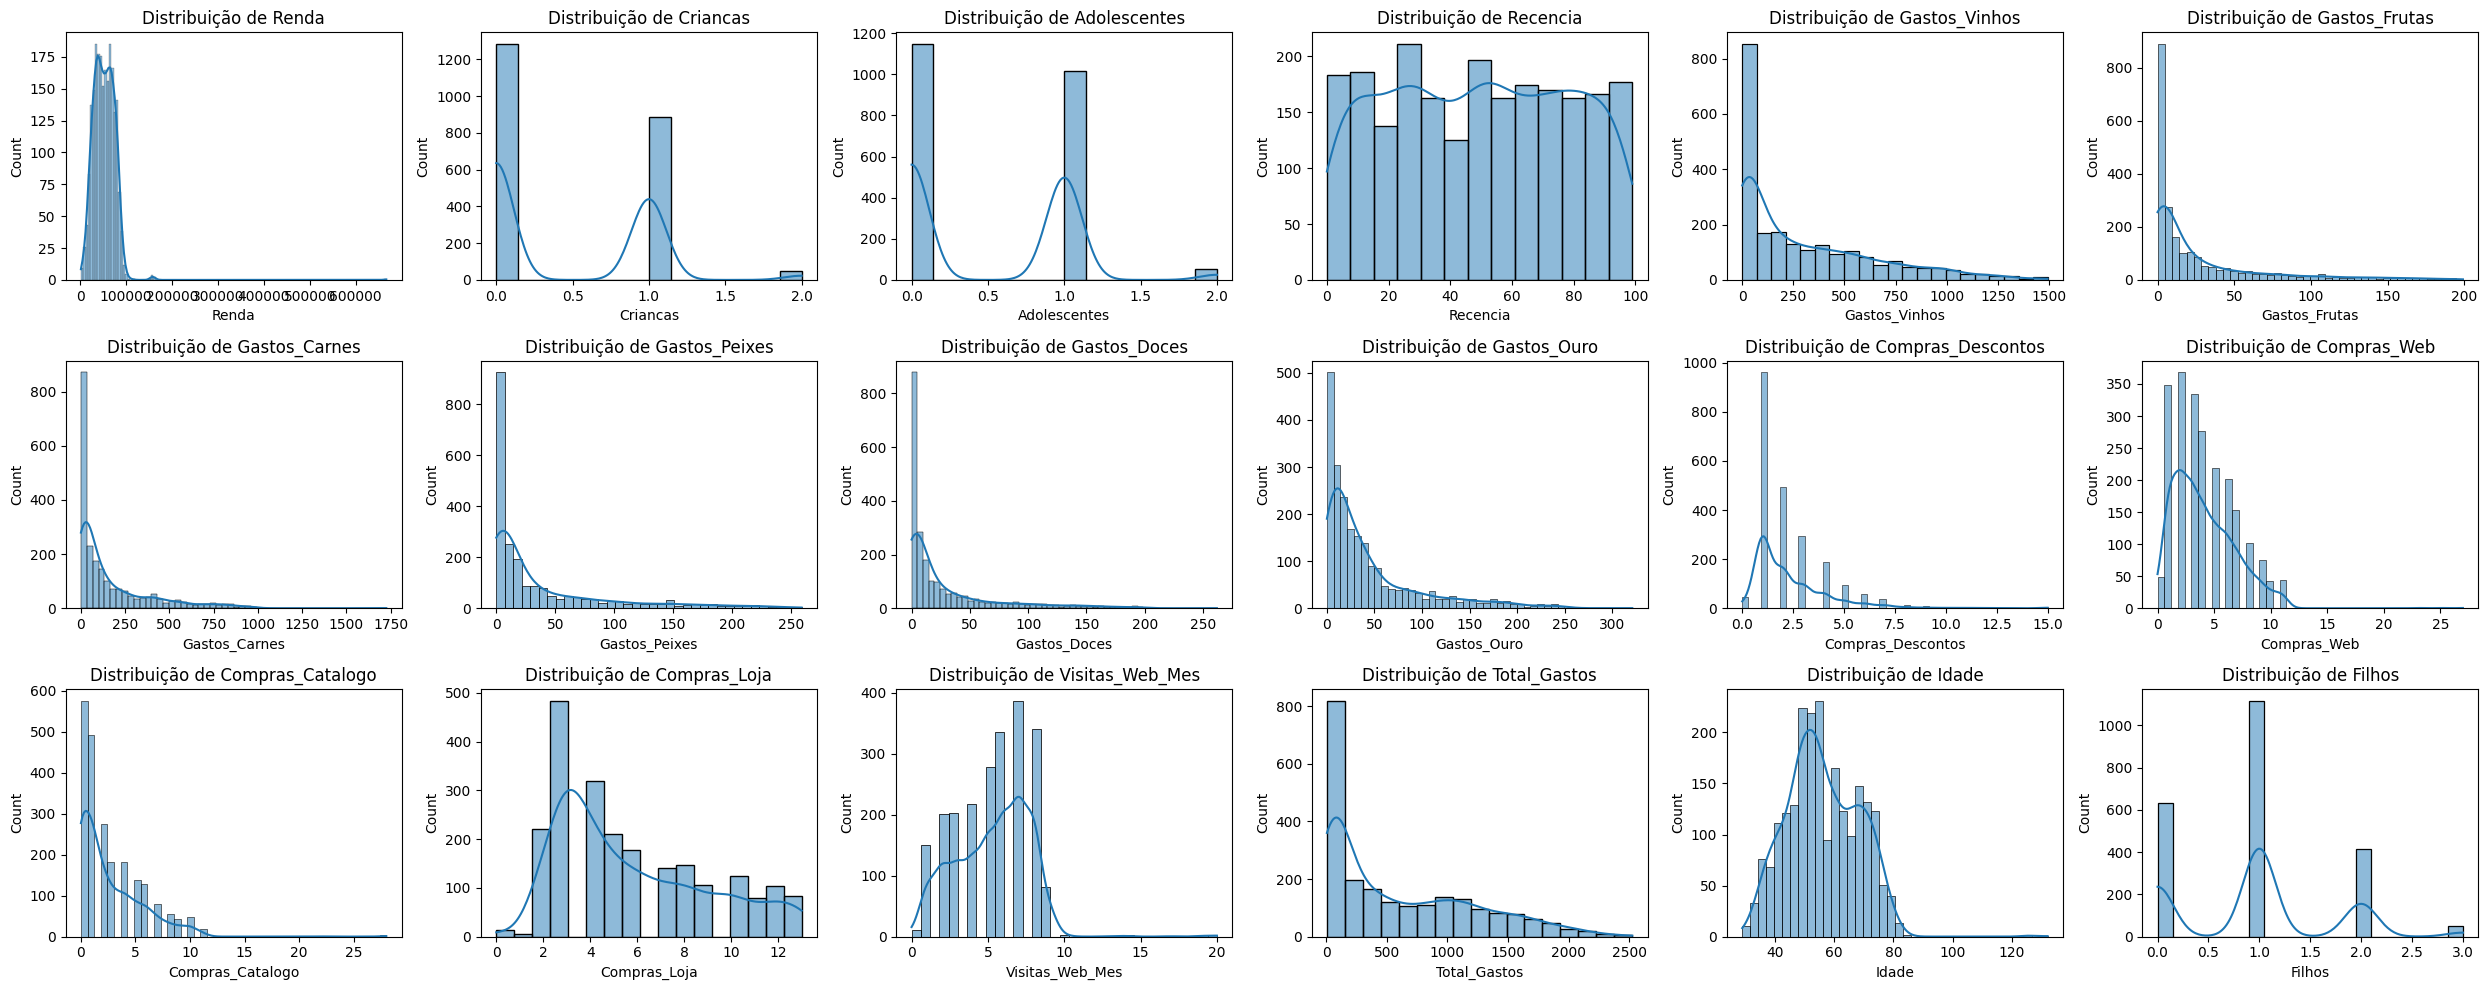

In [34]:
var_num = df.select_dtypes(include='number').columns.tolist()

# Configurar subplots
num_cols = 6
num_rows = -(-len(var_num) // num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 10))
axes = axes.flatten() 

# Plotar cada variável
for i, col in enumerate(var_num):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}")

# Ajustar espaçamento
plt.tight_layout()
plt.show()

Analisando as descritivas e as distribuições, temos os seguintes insights:

* Os clientes recebem em média $52247.251354, que está próxima à nossa mediana, porém o nosso coeficiente de variação é de 48,1% indicando existe uma alta variação entre a renda dos clientes, o que é esperado em variáveis como renda, fica visível quando observamos a distribuição de renda que as observações aparentam estar bem distribuídas, porém com uma assimetria à direita, onde nossa curva está mais alongada por influência de um outlier e na descritiva esse cliente se mostra bem distinto em relação aos outros, com a renda de $666,666 que é muito maior que a de todos os outros clientes.

* Metade dos nossos clientes possuem pelo menos um jovem em casa sendo criança ou adolescente.

* Na variável idade, apesar de não sabermos à priori a data da base de dados, ela não parece estar fora de realidade, sendo a média de idade de 56 anos (bem próxima da mediana) com as observações bem distribuídas, a não ser por um outlier que faz exatamente a mesma coisa que havia acontecido na variável de renda, que também alonga a cauda da nossa distribuição à direita sendo a idade desse cliente de 132 anos, que não é esperado.

* Os clientes em geral tendem a preferir comprar na loja, porém, a média está próxima das comprar feitas pela Web, iremos comparar essas médias para verificar se existe uma diferença estatisticamente significante.

* Considerando a média de gastos em produtos, é possível observar que Vinhos e Carnes são dois produtos que em geral os clientes têm maiores gastos e apesar de terem um desvio padrão muito grande, sendo nos dois casos até maior que a média, quando analisamos a mediana (que não é afetada por outliers) desses produtos ainda sim elas se sobressaem em relação os outros, então podemos dizer que esses dois produtos são produtos que em geral os clientes gastam mais.

* A coluna recência mede quão recente foi a última compra de um cliente, no caso temos uma média de 49 dias com um desvio padrão de aproximadamente 29 dias, indicando que a maioria dos clientes tem uma recência dentro do intervalo de 49±29 dias (aproximadamente de 20 a 78 dias) e quando olhamos o 3º quartil podemos concluir que pelo menos 75% dos clientes compraram nos últimos 74 dias.

* A priori parece que as campanhas não tiveram uma boa aceitação para a maioria dos clientes, podendo indicar que as campanhas não estão sendo bem direcionados, para auxiliar nesse objetivo iremos mais pra frente fazer uma clusterização, com intuito de segmentar esses clientes em grupos de forma que eles tenham características parecidas dentro do grupo e características diferentes em comparação com outros grupos.

A partir dos insights, vou analisar a variável renda e idade, onde identifiquei um outliers.

In [35]:
outliers = df[(df["Renda"] == 666666) |(df["Idade"] >= 100)]
outliers

,Educacao,Estado_Civil,Renda,Criancas,Adolescentes,Data_Insc,Recencia,Gastos_Vinhos,Gastos_Frutas,Gastos_Carnes,...,Acc_Campanha3,Acc_Campanha4,Acc_Campanha5,Acc_Campanha1,Acc_Campanha2,Reclamacao,Resposta,Total_Gastos,Idade,Filhos
192,Sem Graduacao,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,...,0,0,0,0,0,1,0,65,125,1
239,Sem Graduacao,Single,60182.0,0,1,2014-05-17,23,8,0,5,...,0,0,0,0,0,0,0,22,132,1
339,Pos_graduacao,Together,83532.0,0,0,2013-09-26,36,755,144,562,...,0,0,1,0,0,0,0,1853,126,0
2233,Graduacao,Together,666666.0,1,0,2013-06-02,23,9,14,18,...,0,0,0,0,0,0,0,62,48,1


Pelo descritiva do cliente alta renda, que aparece na última linha acima, é possível observar que os gastos dele foram bem abaixo da média, apenas com essa informação não conseguimos dizer se a renda dele está errada ou não, porém, se o cliente com a renda alta tivesse gastos maiores que a média dos nossos clientes, isso poderia ser um indicador de que realmente a renda dele é real, mas como ele aparenta ser um cliente com erro de digitação e como a renda dele até comparada com outros outliers é muito acima, vou removê-lo da nossa base juntamente com clientes que possuem uma idade maior que 99 anos.

In [36]:
df = df[(df['Renda'] != 666666) & (df["Idade"] < 100)]


In [37]:
df["Idade"].describe()

count    2212.000000
mean       56.086347
std        11.701599
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max        85.000000
Name: Idade, dtype: float64

Através do Box-Plot, irei ver quais são as outras variáveis que contém outliers.

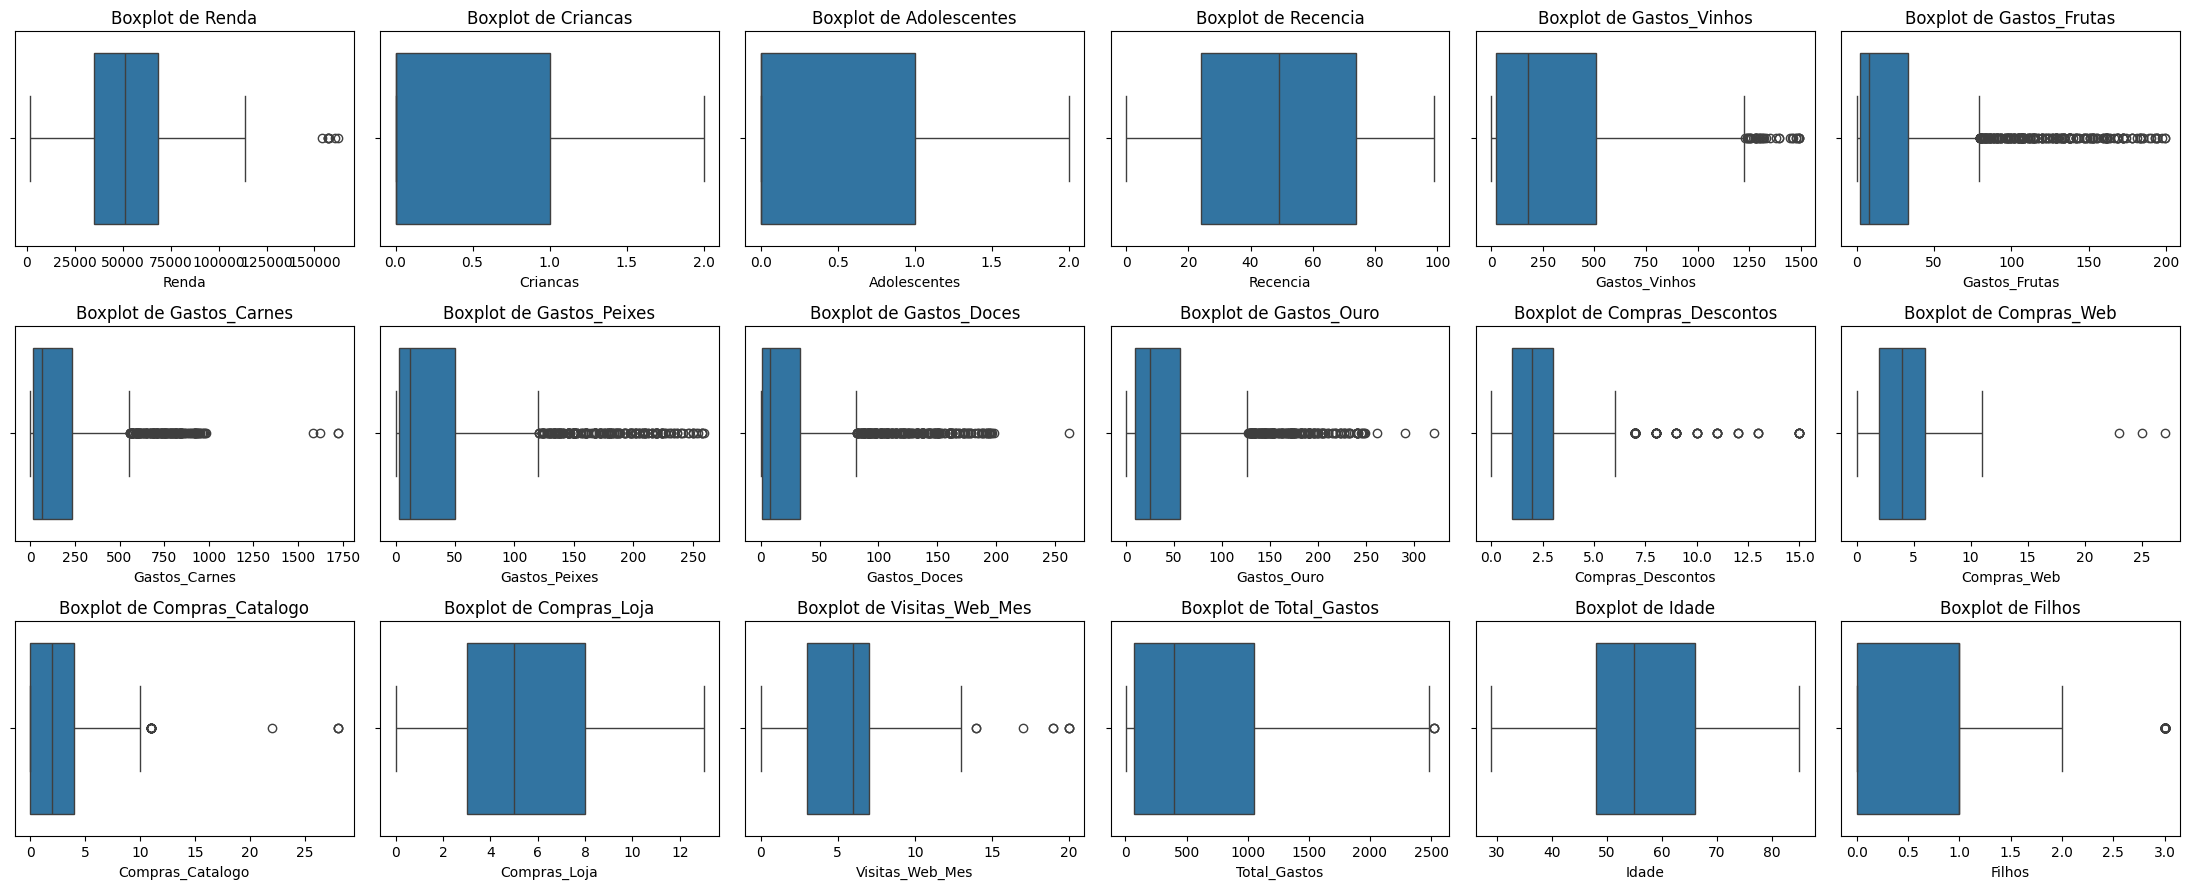

In [38]:
n_cols = 6
n_rows = -(-len(var_num) // n_cols)  # Calcula o número de linhas necessário (arredondamento para cima)

plt.figure(figsize=(22, n_rows * 3))
for i, var in enumerate(var_num):
    plt.subplot(n_rows, n_cols, i + 1)  # Organiza os subplots em um layout com várias colunas
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.tight_layout()

plt.show()

De modo geral, é possível observar que temos muitos outliers, que é esperado, principlamente em variáveis que representaM valores gastos em produtos, onde sabemos que é natural pois alguns clientes compram mais que outros, essas informações serão relevantes na clusterização e não indicam inconsistência nos dados, por isso, não irei removê-las. Na variável renda ainda existem alguns outliers que irei remover.

In [39]:
Q1 = df['Renda'].quantile(0.25)
Q3 = df['Renda'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['Renda'] >= limite_inferior) & (df['Renda'] <= limite_superior)]

Agora vou analisar as correlações entre as variáveis para entender melhor os padrões e tendências nos dados. Quero identificar relações mais fortes, sejam positivas ou negativas, que possam ajudar a orientar estratégias de negócios.

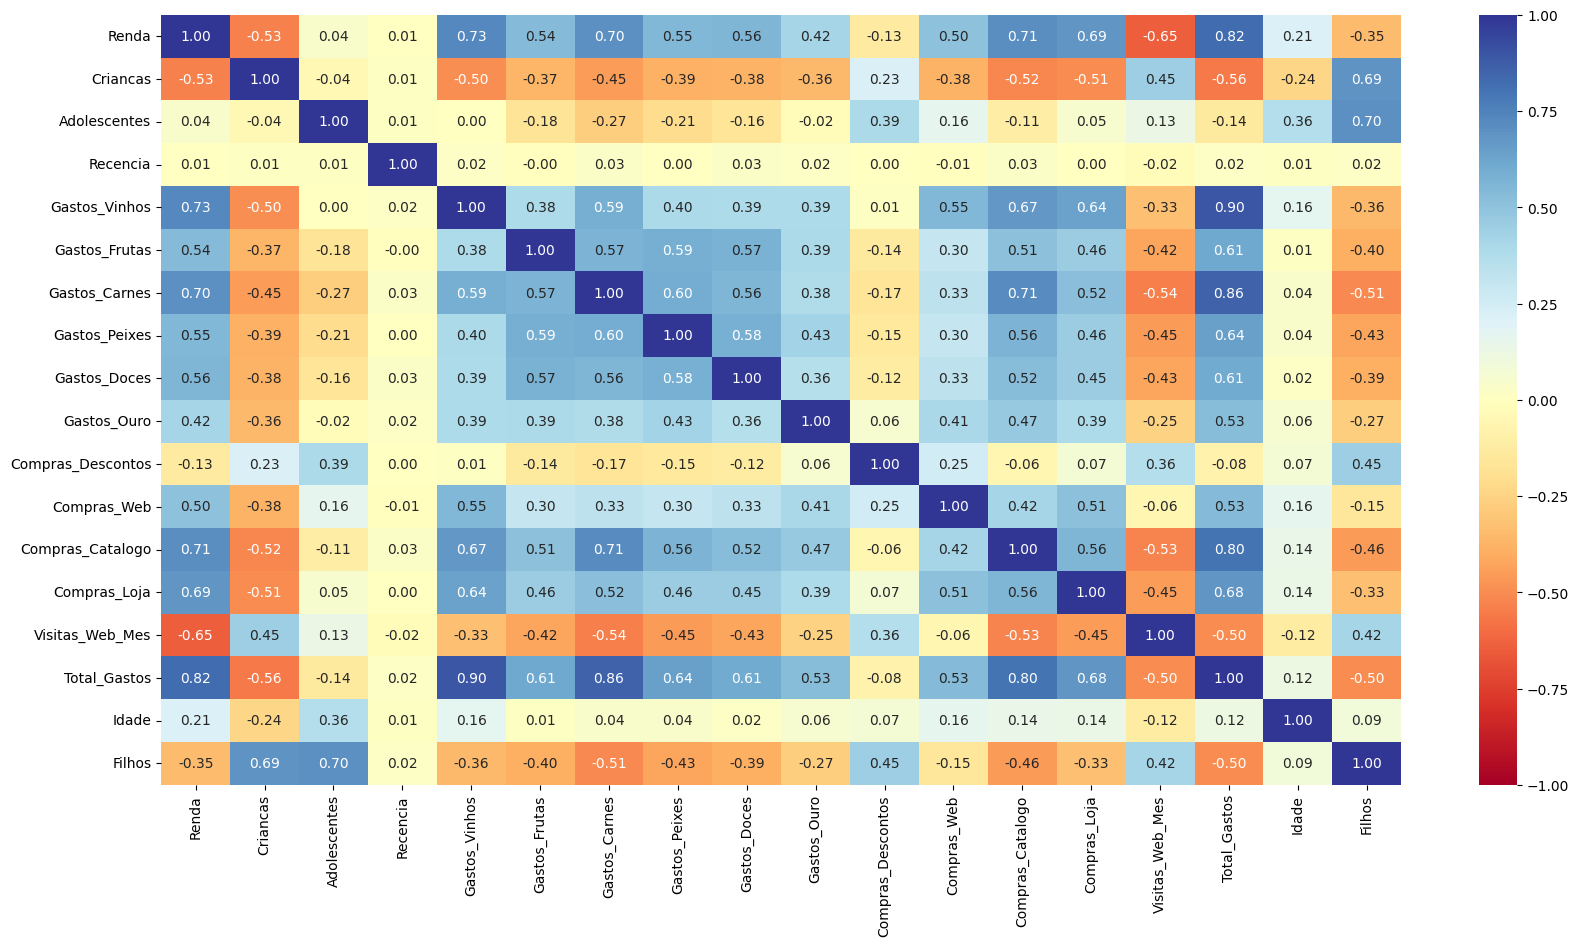

In [40]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="RdYlBu", cbar=True)
plt.show()

### Correlações

* Renda e Total Gastos (r = 0.82): Clientes com maior renda tendem a gastar mais em geral, isso faz sentido, pois pessoas com mais recursos têm maior poder de compra.

* Total Gastos e Gastos em Vinhos (r = 0.90) e Total Gastos e Gastos em Carnes (r = 0.86): Como já havíamos observado anteriormente os maiores gastos são em vinhos e carne, e aqui essa relação fica mais evidente, sugerindo que esses produtos podem ser mais importantes para o faturamento.

* Compras pelo Catálogo e Total Gastos (r = 0.80): As compras realizadas pelo catálogo apresentam uma forte correlação com os gastos totais, indicando que na medida em que as compras pelo catálogo crescem, o total de gastos também cresce, e com esse coeficiente alto, pode indicar que esse canal é relevante para o faturamento. As compras realizadas na loja física também mostram uma correlação alta com os gastos totais (r = 0.68), que apesar de ser um pouco menor em comparação ao catálogo, ainda demonstra uma relação de crescimento conjunto.

* Renda e Compras na Loja (r = 0,69) e Renda e Catálogo (r = 0,71): Isso sugere que clientes de alta renda podem preferir canais mais tradicionais, como loja física ou catálogo.

* Visitas ao Site e Renda (r = -0.65): Clientes com maior renda tendem a visitar o site menos frequentemente.

* Crianças, Renda e Total Gastos (r = -0.56): Clientes com menos crianças tendem a ter rendas mais altas e maiores gastos.

Renda e Total de Gastos têm uma correlação diretamente proporcional alta, indicando que em geral, pessoas que possuem rendas maiores, tendem a gastarem mais, mas será que pessoas com filhos tendem a gastam menos do que pessoas que não tem filhos?

In [41]:
# Separando clientes que possuem e não possuem filhos
clientes_Loja = df[df['Filhos'] == 0]
clientes_com_filhos = df[df['Filhos'] != 0]

gastos_clientes_Loja = clientes_Loja['Total_Gastos']
gastos_clientes_com_filhos = clientes_com_filhos['Total_Gastos']

media_gastos_Loja = gastos_clientes_Loja.mean()
media_gastos_com_filhos = gastos_clientes_com_filhos.mean()

qtd_Loja = len(clientes_Loja)
qtd_com_filhos = len(clientes_com_filhos)

print(f"Média de gastos (sem filhos): {media_gastos_Loja:.2f} ({qtd_Loja} pessoas) | "
      f"Média de gastos (com filhos): {media_gastos_com_filhos:.2f} ({qtd_com_filhos} pessoas)")

Média de gastos (sem filhos): 1105.59 (628 pessoas) | Média de gastos (com filhos): 408.20 (1577 pessoas)


Aparentemente a média de gastos de clientes sem filhos é maior, porém preciso entender se essas médias têm uma diferença estatisticamente significante.

O próximo passa é testar a normalidade dos meus dados, pois preciso saber se utilizarei um teste paramétrico (onde irei comparar as médias) ou não paramétrico (onde irei comparar as distribuições).

In [42]:
stat_Loja, p_Loja = shapiro(gastos_clientes_Loja)
print(f"Gastos sem filhos - Shapiro-Wilk: Estatística={stat_Loja:.3f}, p={p_Loja:.3f}")

stat_com_filhos, p_com_filhos = shapiro(gastos_clientes_com_filhos)
print(f"Gastos com filhos - Shapiro-Wilk: Estatística={stat_com_filhos:.3f}, p={p_com_filhos:.3f}")


Gastos sem filhos - Shapiro-Wilk: Estatística=0.956, p=0.000
Gastos com filhos - Shapiro-Wilk: Estatística=0.819, p=0.000


Como nosso p-valor < 0.05, isso indica que, com 95% de confiança, nenhuma das nossas distribuições pode ser considerada normal. Irei realizar um teste não paramétrico para comparar as distribuições, já que a normalidade não foi atendida.

Hipóteses:

H0: As distribuições dos dois grupos são iguais (não há diferença significativa nos gastos).

H1: As distribuições dos dois grupos são diferentes (existe uma diferença significativa nos gastos).

In [43]:
stat, p = mannwhitneyu(gastos_clientes_Loja, gastos_clientes_com_filhos)
print(f"Estatística={stat:.3f}, p={p:.3f}")

Estatística=791000.000, p=0.000


Como nosso p-valor = 0.000, rejeitamos H0 e podemos concluir com até 99% de confiança que existe uma diferença significativa nos gastos, ou seja,
pessoas sem filhos tendem a gastar mais.

Uma outra hipótese que queremos entender, é se os clientes em geral tem alguma preferência de canal de compra, e se sim, qual ou quais seriam esses canais.

Primeiro iremos testar a normalidade das variáveis que indicam as compras feitas por cada canal.

In [44]:
stat_loja, p_loja = shapiro(df['Compras_Loja'])
print(f"Compras em Loja - Shapiro-Wilk: Estatística={stat_loja:.3f}, p={p_loja:.3f}")

stat_web, p_web = shapiro(df['Compras_Web'])
print(f"Compras na Web - Shapiro-Wilk: Estatística={stat_web:.3f}, p={p_web:.3f}")

stat_catalogo, p_catalogo = shapiro(df['Compras_Catalogo'])
print(f"Compras por Catálogo - Shapiro-Wilk: Estatística={stat_catalogo:.3f}, p={p_catalogo:.3f}")

Compras em Loja - Shapiro-Wilk: Estatística=0.901, p=0.000
Compras na Web - Shapiro-Wilk: Estatística=0.908, p=0.000
Compras por Catálogo - Shapiro-Wilk: Estatística=0.842, p=0.000


Como nosso p-valor < 0.05, isso indica que, com 95% de confiança, nenhuma das nossas distribuições pode ser considerada normal. Para comparar as distribuições, utilizarei o método de Bonferroni para ajustar os níveis de significância devido às múltiplas comparações entre os pares de variáveis.

Hipóteses:

H0: As distribuições dos dois grupos são iguais (não há diferença significativa no no número de compras entre os canais).

H1: As distribuições dos dois grupos são diferentes (existe uma diferença significativa no no número de compras entre os canais).

In [45]:
# Dados agrupados em uma lista (cada grupo corresponde a uma variável de compras)
canais = [df['Compras_Loja'], df['Compras_Web'], df['Compras_Catalogo']]

# Realizando o teste de Dunn com ajuste de Bonferroni
resultados_dunn = sp.posthoc_dunn(canais, p_adjust='bonferroni')

# Exibindo os resultados
print(resultados_dunn)

               1             2              3
1   1.000000e+00  2.174157e-60  2.501068e-272
2   2.174157e-60  1.000000e+00   1.256615e-78
3  2.501068e-272  1.256615e-78   1.000000e+00


Logo, com 95% de confiança, podemos concluir que, em termos gerais, as distribuições indicam uma hierarquia de preferência entre os canais: Loja > Web > Catálogo

## Feature Engineer

Além das variáveis já criadas anteriormente ('Educacao', 'Total_Gastos', 'Idade' e 'Filhos'), analisarei as colunas restantes e, se necessário, criarei novas variáveis com o objetivo de auxiliar na separação dos grupos.

In [46]:
df.columns

Index(['Educacao', 'Estado_Civil', 'Renda', 'Criancas', 'Adolescentes',
       'Data_Insc', 'Recencia', 'Gastos_Vinhos', 'Gastos_Frutas',
       'Gastos_Carnes', 'Gastos_Peixes', 'Gastos_Doces', 'Gastos_Ouro',
       'Compras_Descontos', 'Compras_Web', 'Compras_Catalogo', 'Compras_Loja',
       'Visitas_Web_Mes', 'Acc_Campanha3', 'Acc_Campanha4', 'Acc_Campanha5',
       'Acc_Campanha1', 'Acc_Campanha2', 'Reclamacao', 'Resposta',
       'Total_Gastos', 'Idade', 'Filhos'],
      dtype='object')

In [47]:
print(df['Estado_Civil'].value_counts(normalize=True))

Estado_Civil
Married     0.387302
Together    0.257596
Single      0.213152
Divorced    0.104308
Widow       0.034467
Alone       0.001361
Absurd      0.000907
YOLO        0.000907
Name: proportion, dtype: float64


Primeiramente irei criar uma nova variável chamada "Convivencia", onde irei reduzir as variáveis de Estado Civil em "Sozinho(a)" e "Parceiro(a)"

In [48]:
df['Convivencia'] = df['Estado_Civil'].map({'Married': 'Parceiro(a)', 'Together': 'Parceiro(a)', 'Single': 'Sozinho(a)', 'Divorced': 'Sozinho(a)', 'Widow': 'Sozinho(a)', 'Alone': 'Sozinho(a)', 'Absurd': 'Sozinho(a)', 'YOLO': 'Sozinho(a)'})

Em seguida criarei uma variável 'Total_Compras' que vai me indicar a quantidade de compras totais de cada cliente e uma outra variável chamada 'Gasto_Medio', referindo-se a média de gastos por cliente.

In [49]:
df['Total_Compras'] = df['Compras_Descontos'] + df['Compras_Web'] + df['Compras_Catalogo'] + df['Compras_Loja']
df['Gasto_Medio'] = df['Total_Gastos'] / df['Total_Compras'].replace(0, np.nan)
df['Gasto_Medio'].fillna(0, inplace=True)

C:\Users\gabri\AppData\Local\Temp\ipykernel_2220\2847491538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gasto_Medio'].fillna(0, inplace=True)


Criarei também uma variável 'Acc_Camp', que irá indicar o total de aceitação de campanhas de cada cliente.

In [50]:
df['Acc_Campanha1'] = df['Acc_Campanha1'].astype(int)
df['Acc_Campanha2'] = df['Acc_Campanha2'].astype(int) 
df['Acc_Campanha3'] = df['Acc_Campanha3'].astype(int)
df['Acc_Campanha4'] = df['Acc_Campanha4'].astype(int)
df['Acc_Campanha5'] = df['Acc_Campanha5'].astype(int)

df['Acc_Camp'] = df['Acc_Campanha1'] + df['Acc_Campanha2'] + df['Acc_Campanha3'] + df['Acc_Campanha4'] + df['Acc_Campanha5']
df['Acc_Camp'].value_counts()

Acc_Camp
0    1747
1     322
2      81
3      44
4      11
Name: count, dtype: int64

Variável "Tamanho_Familia" indicando o total de pessoas que moram em uma casa.

In [51]:
df['Tamanho_Familia'] = df["Convivencia"].replace({'Sozinho(a)': 1, 'Parceiro(a)': 2})+ df['Filhos']
df['Tamanho_Familia'] = df['Tamanho_Familia'].astype(int)

C:\Users\gabri\AppData\Local\Temp\ipykernel_2220\826667193.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tamanho_Familia'] = df["Convivencia"].replace({'Sozinho(a)': 1, 'Parceiro(a)': 2})+ df['Filhos']


Por fim, irei criar uma variável "Anos_Relacionamento" que indica o tempo em anos de relacionamento entre o cliente e a empresa.

In [52]:
df['Anos_Relacionamento'] = (2025 -  df['Data_Insc'].dt.year)

Analisarei a variável 'Educação' para identificar qual o nível de escolaridade dos clientes.

In [53]:
df['Educacao'].value_counts(1)

Educacao
Graduacao        0.504762
Pos_graduacao    0.380952
Sem Graduacao    0.114286
Name: proportion, dtype: float64

Vemos que quase 90% dos nossos clientes possui pelo menos uma graduação e 38% possuem pós-graduação.

Por fim irei remover algumas variáveis por motivos de desbalanceamento e por suas características já estarem contidas em outras variáveis.

In [54]:
df.drop(columns=[ 'Estado_Civil','Data_Insc', 'Acc_Campanha1', 'Acc_Campanha2', 'Acc_Campanha3', 'Acc_Campanha4', 'Acc_Campanha5', 'Reclamacao', 'Resposta'],
 inplace=True)

Agora, irei criar um novo df, chamado "df_novas" para entender como estão as novas variáveis que criei se comportam e, em seguida, calcularei as correlações do nosso df original, que a priori contém as variáveis que usaremos na clusterização para verificar como as variáveis estão se relacionando.

In [55]:
df_novas = df[['Convivencia', 'Total_Compras', 'Gasto_Medio', 'Acc_Camp', 'Tamanho_Familia', 'Anos_Relacionamento']]

In [56]:
df_novas.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Compras,2205.0,14.887982,7.615277,0.0,8.000000,15.000,21.000000,43.0
Gasto_Medio,2205.0,32.590924,28.556446,0.0,9.714286,23.375,45.346154,186.5
Acc_Camp,2205.0,0.299320,0.680440,0.0,0.000000,0.000,0.000000,4.0
Tamanho_Familia,2205.0,2.593651,0.906197,1.0,2.000000,3.000,3.000000,5.0
Anos_Relacionamento,2205.0,11.972336,0.686039,11.0,12.000000,12.000,12.000000,13.0


Algo que me chamou a atenção nas descritivas das novas variáveis são os valores de mínimo de total de compras e gasto médio, por isso irei analisá-los.

In [57]:
pd.set_option('display.max_columns', None)

sem_compras = df[df['Total_Compras'] == 0]
sem_compras

,Educacao,Renda,Criancas,Adolescentes,Recencia,Gastos_Vinhos,Gastos_Frutas,Gastos_Carnes,Gastos_Peixes,Gastos_Doces,Gastos_Ouro,Compras_Descontos,Compras_Web,Compras_Catalogo,Compras_Loja,Visitas_Web_Mes,Total_Gastos,Idade,Filhos,Convivencia,Total_Compras,Gasto_Medio,Acc_Camp,Tamanho_Familia,Anos_Relacionamento
981,Graduacao,4861.0,0,0,20,2,1,1,1,0,1,0,0,0,0,14,6,60,0,Sozinho(a),0,0.0,0,1,11
1524,Graduacao,3502.0,1,0,56,2,1,1,0,0,1,0,0,0,0,14,5,52,1,Sozinho(a),0,0.0,0,2,12


Percebi uma inconsistência nos dados. Temos dados faltantes pra esses dois clientes, esses dados referem-se às compras, não está indicado o canal de compras desses clientes, por isso, os valores de gasto e do total de compras voltaram zerados, irei removê-los.

In [58]:
df = df[(df['Total_Compras'] != 0)]
df_novas = df_novas[(df_novas['Total_Compras'] != 0)]

In [59]:
df_novas.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Compras,2203.0,14.901498,7.605499,1.000000,8.000000,15.000000,21.000000,43.0
Gasto_Medio,2203.0,32.620512,28.552507,0.533333,9.714286,23.384615,45.360577,186.5
Acc_Camp,2203.0,0.299591,0.680689,0.000000,0.000000,0.000000,0.000000,4.0
Tamanho_Familia,2203.0,2.594644,0.905884,1.000000,2.000000,3.000000,3.000000,5.0
Anos_Relacionamento,2203.0,11.972764,0.686038,11.000000,12.000000,12.000000,12.000000,13.0


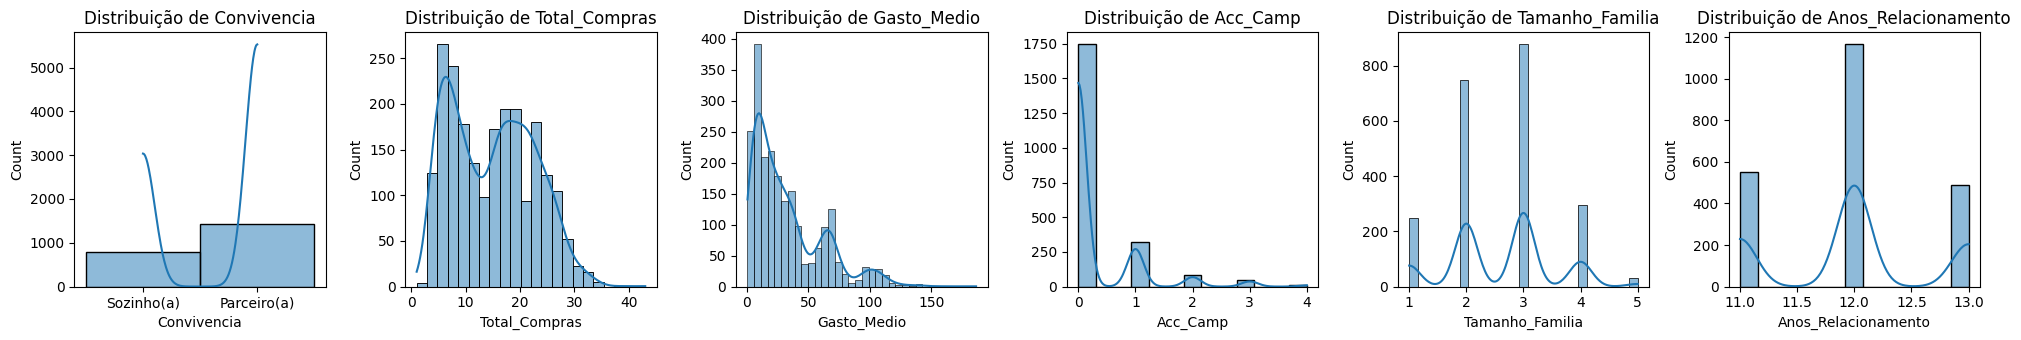

In [60]:
# Configurar subplots
var_novas = df_novas.columns.tolist()
num_cols =  6 # Número de colunas no grid
num_rows = -(-len(var_novas) // num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 3.5))
axes = axes.flatten()

# Plotar cada variável criada
for i, col in enumerate(var_novas):
    sns.histplot(data=df_novas, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}")

# Remover subplots não utilizados (se existirem)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espaçamento e exibir o gráfico
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

Analisando as descritivas e as distribuições das variáveis criadas, temos os seguintes insights:

* Total de Compras: Pelo menos metade dos nossos clientes compram 15 ou mais produtos, independente do canal.

* Gasto Médio: A maior parte dos clientes possui um gasto médio em torno de $32,62, com uma distribuição variando de $0,53 a $186,5, isso mostra diferenças significativas no comportamento de consumo entre os clientes.

* Aceitação das Campanhas: Como já observado anteriormente, as campanhas não tiveram uma boa aceitação para a maioria dos clientes, o intuito é que com a clusterização, as campanhas sejam melhores direcionadas podendo impactar diferentemente cada grupo que será criado.

* Tamanho da Família: A maioria dos nossos clientes possuem 3 ou mais integrantes em casa, indicando também que a maioria dos clientes convivem com um parceiro, que pode ser observado tanto na distribuição, como na descritiva da variável 'Convivência'.

* Anos de Relacionamento: A maioria dos clientes possuem um relacionamento de 12 anos, sendo o mínimo 11 anos e o máximo 13 anos.

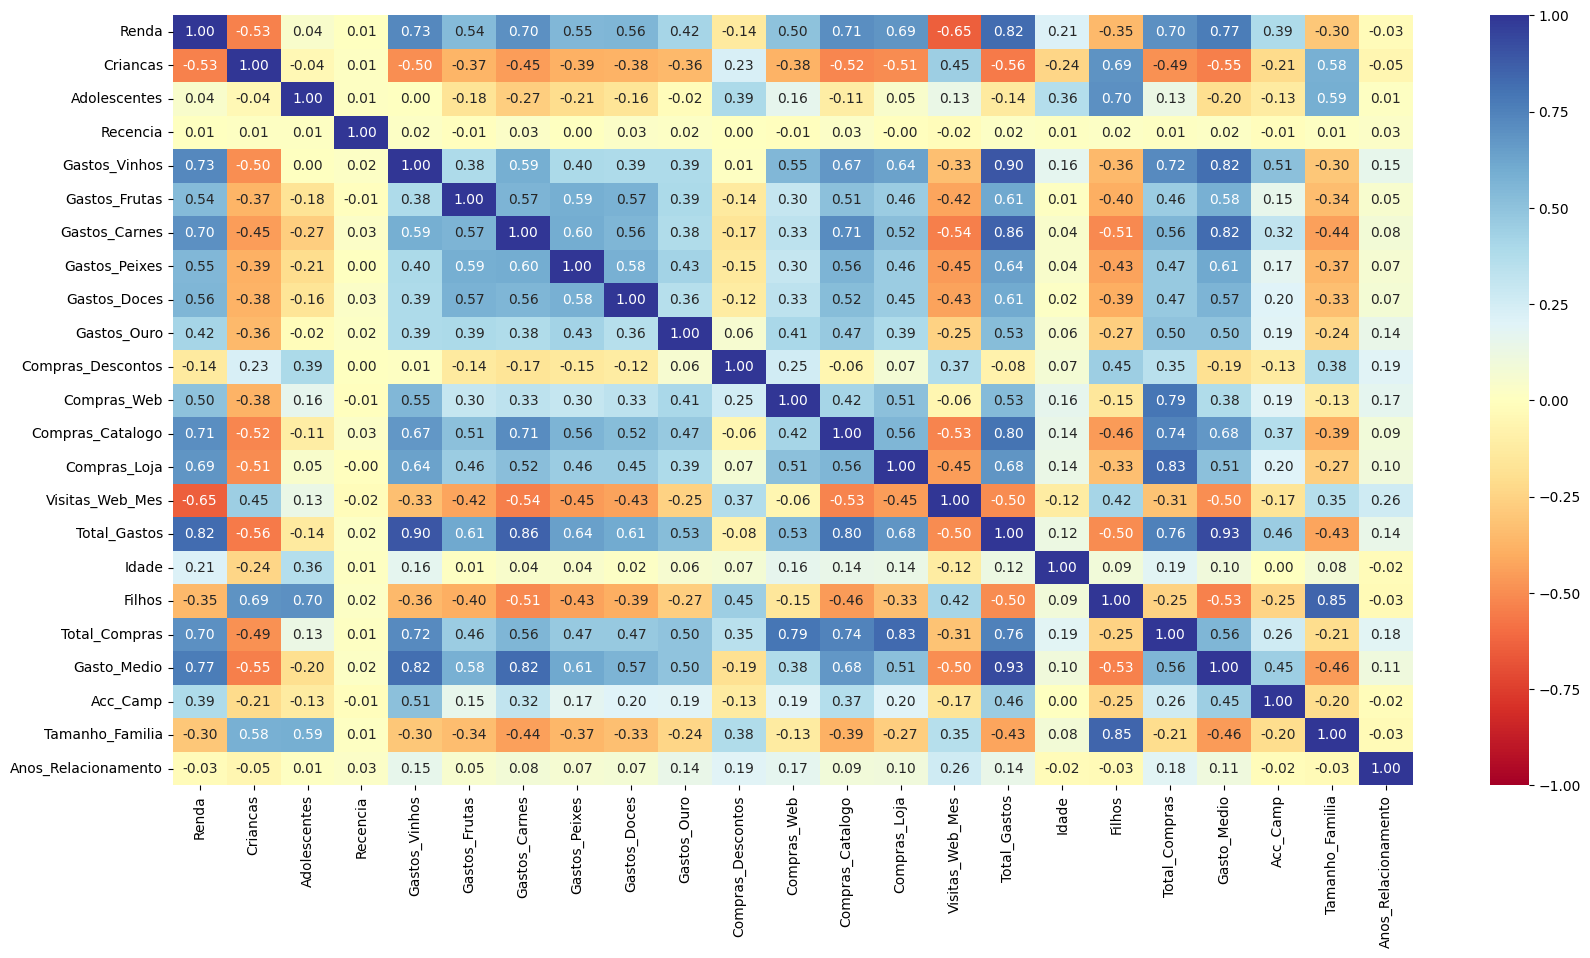

In [61]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="RdYlBu", cbar=True)
plt.show()

### Conclusão
Através da Análise Exploratória dos Dados, conseguimos ter os seguintes insights:

* Clientes sem filhos gastam mais: Descobrimos que clientes sem crianças ou adolescentes em casa tendem a gastar bem mais do que aquelas com filhos.

* Hierarquia de canais preferidos: Os clientes preferem fazer compras nas lojas físicas, seguidas pelo site, enquanto o catálogo aparece como a última opção. Essa preferência já esperada foi confirmada, mas também nos mostra que há uma oportunidade de melhorar os canais digitais para torná-los mais atrativos.

* Os maiores gastos estão em vinhos e carnes: Esses dois produtos se destacam como as principais categorias de despesa.

* Baixa aceitação das campanhas: As campanhas de marketing atuais não estão conseguindo engajar a maioria dos clientes.

* Clientes com maior renda gastam mais: A renda tem uma influência direta no comportamento de compra.

* Perfil Educacional e Familiar: A grande maioria dos clientes tem pelo menos uma graduação, e metade possui pelo menos um filho.

In [62]:
df.to_csv('df_tratado.csv', index=False)

In [63]:
print(f"Com as transformações que fizemos, nosso DataFrame agora está com {df.shape[0]} linhas, {df.shape[1]} colunas, e estas são as colunas:")
print(df.columns.tolist())

Com as transformações que fizemos, nosso DataFrame agora está com 2203 linhas, 25 colunas, e estas são as colunas:
['Educacao', 'Renda', 'Criancas', 'Adolescentes', 'Recencia', 'Gastos_Vinhos', 'Gastos_Frutas', 'Gastos_Carnes', 'Gastos_Peixes', 'Gastos_Doces', 'Gastos_Ouro', 'Compras_Descontos', 'Compras_Web', 'Compras_Catalogo', 'Compras_Loja', 'Visitas_Web_Mes', 'Total_Gastos', 'Idade', 'Filhos', 'Convivencia', 'Total_Compras', 'Gasto_Medio', 'Acc_Camp', 'Tamanho_Familia', 'Anos_Relacionamento']
